In [1]:
from pandas import read_csv
import pandas as pd
data = pd.read_csv('/content/Credit_Score_Cleaned_Data.csv')

len(data)


10000

In [2]:
data.value_counts(['Credit_Score'])

,count
Credit_Score,
Standard,5317
Poor,2900
Good,1783


In [3]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Occupation                10000 non-null  object 
 3   Annual_Income             10000 non-null  float64
 4   Monthly_Inhand_Salary     10000 non-null  float64
 5   Num_Bank_Accounts         10000 non-null  int64  
 6   Num_Credit_Card           10000 non-null  int64  
 7   Interest_Rate             10000 non-null  float64
 8   Num_of_Loan               10000 non-null  int64  
 9   Type_of_Loan              10000 non-null  object 
 10  Delay_from_due_date       10000 non-null  float64
 11  Num_of_Delayed_Payment    10000 non-null  int64  
 12  Changed_Credit_Limit      10000 non-null  float64
 13  Num_Credit_Inquiries      10000 non-null  int64  
 14  Credit_

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset (Replace with actual file path)
data = pd.read_csv('/content/Credit_Score_Cleaned_Data.csv')

# Define features and target
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Bin Age
age_bins = [14, 24, 32, 40, 56]
age_labels = ['Younger Adults', 'Young Adults', 'Middle-Aged Adults', 'Older Adults']
X['Age_Group'] = pd.cut(X['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Bin Annual_Income
income_bins = [0, 20000, 50000, 100000, float('inf')]
income_labels = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income']
X['Income_Group'] = pd.cut(X['Annual_Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Keep a copy of the original X_test for demographic analysis
original_X_test = X_test.copy()

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns to avoid mismatch
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Overall Classification Report
print("Overall Classification Report:")
print(classification_report(y_test, y_pred))

# Define demographics to analyze
demographics = ['Age_Group', 'Occupation', 'Income_Group']

# Analyze performance by demographic
for demo in demographics:
    print(f"\nClassification Report by {demo}:")
    groups = original_X_test[demo].unique()

    for group in groups:
        # Get group indices
        group_idx = original_X_test[original_X_test[demo] == group].index

        # Get true and predicted values for the group
        y_true_group = y_test.loc[group_idx]
        y_pred_group = pd.Series(y_pred, index=X_test.index).loc[group_idx]

        # Classification report for the group
        print(f"\nGroup: {group}")
        print(classification_report(y_true_group, y_pred_group))


Overall Classification Report:
              precision    recall  f1-score   support

        Good       0.59      0.54      0.57       535
        Poor       0.69      0.63      0.65       870
    Standard       0.70      0.76      0.73      1595

    accuracy                           0.68      3000
   macro avg       0.66      0.64      0.65      3000
weighted avg       0.68      0.68      0.68      3000


Classification Report by Age_Group:

Group: Older Adults
              precision    recall  f1-score   support

        Good       0.59      0.59      0.59       191
        Poor       0.70      0.47      0.56       175
    Standard       0.69      0.78      0.73       432

    accuracy                           0.67       798
   macro avg       0.66      0.61      0.63       798
weighted avg       0.67      0.67      0.66       798


Group: Middle-Aged Adults
              precision    recall  f1-score   support

        Good       0.64      0.54      0.59       138
        Poor 

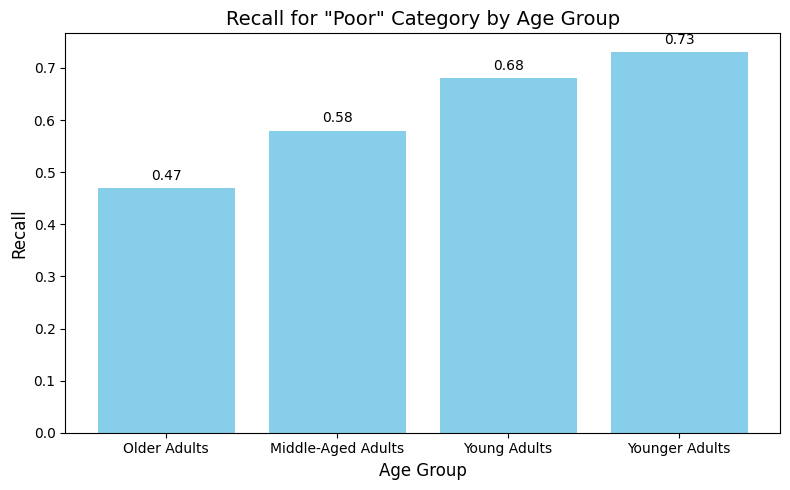

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Age groups and corresponding recall values for the "Poor" category
age_groups = ['Older Adults', 'Middle-Aged Adults', 'Young Adults', 'Younger Adults']
recall_poor = [0.47, 0.58, 0.68, 0.73]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(age_groups, recall_poor, color='skyblue')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
ax.set_title('Recall for "Poor" Category by Age Group', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


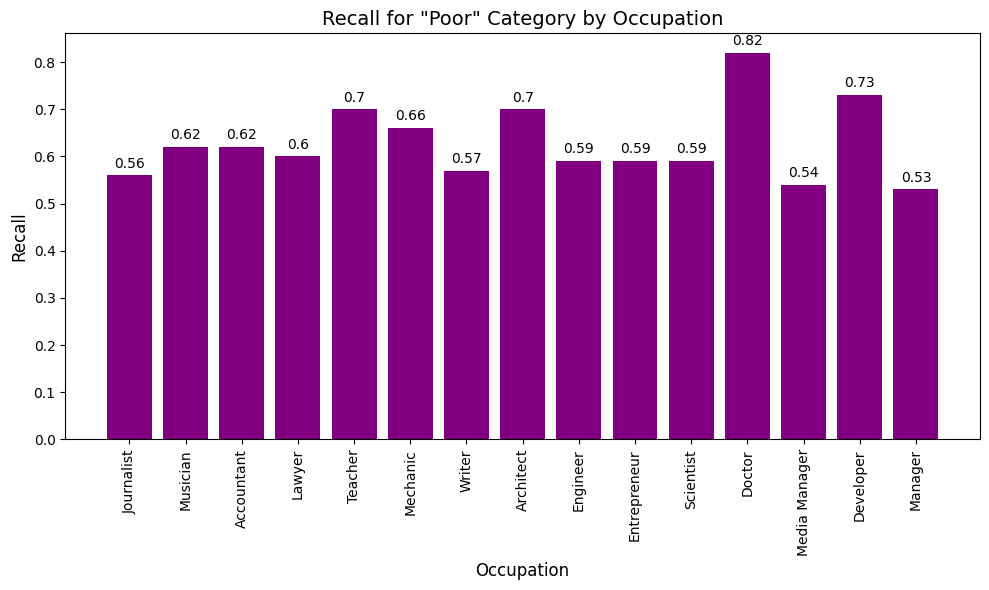

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Occupations and corresponding recall values for the "Poor" category
occupations = ['Journalist', 'Musician', 'Accountant', 'Lawyer', 'Teacher',
               'Mechanic', 'Writer', 'Architect', 'Engineer', 'Entrepreneur',
               'Scientist', 'Doctor', 'Media Manager', 'Developer', 'Manager']
recall_poor = [0.56, 0.62, 0.62, 0.60, 0.70, 0.66, 0.57, 0.70, 0.59, 0.59,
               0.59, 0.82, 0.54, 0.73, 0.53]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(occupations, recall_poor, color='purple')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
ax.set_title('Recall for "Poor" Category by Occupation', fontsize=14)
ax.set_xlabel('Occupation', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


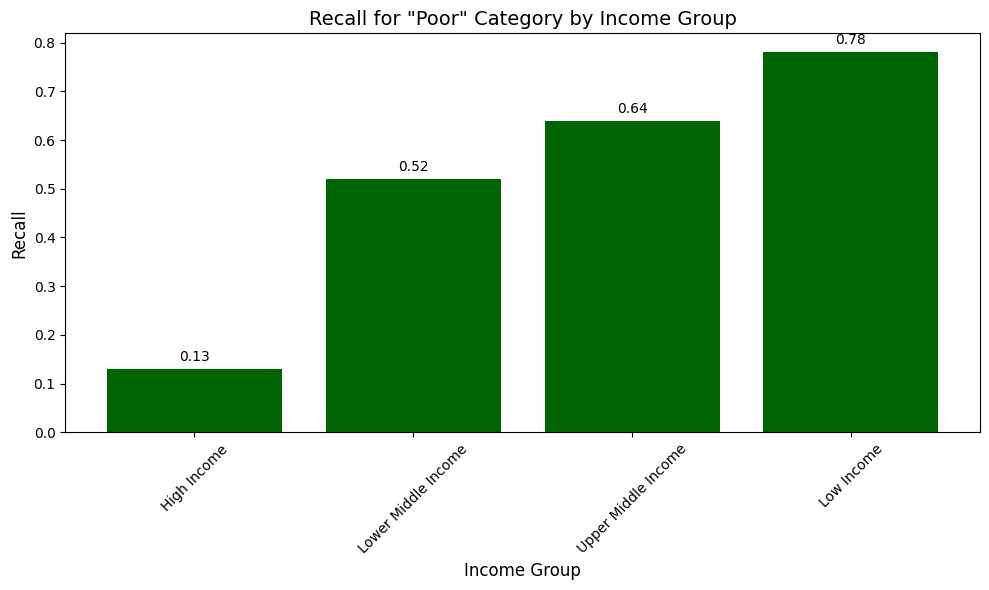

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Income groups and corresponding recall values for the "Poor" category
income_groups = ['High Income', 'Lower Middle Income', 'Upper Middle Income', 'Low Income']
recall_poor = [0.13, 0.52, 0.64, 0.78]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(income_groups, recall_poor, color='darkgreen')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
ax.set_title('Recall for "Poor" Category by Income Group', fontsize=14)
ax.set_xlabel('Income Group', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Age groups and corresponding recall values for the "Poor" category
age_groups = ['Older Adults', 'Middle-Aged Adults', 'Young Adults', 'Younger Adults']
recall_poor = [0.47, 0.58, 0.68, 0.73]


# Occupations and corresponding recall values for the "Poor" category
occupations = ['Journalist', 'Musician', 'Accountant', 'Lawyer', 'Teacher',
               'Mechanic', 'Writer', 'Architect', 'Engineer', 'Entrepreneur',
               'Scientist', 'Doctor', 'Media Manager', 'Developer', 'Manager']
recall_poor = [0.56, 0.62, 0.62, 0.60, 0.70, 0.66, 0.57, 0.70, 0.59, 0.59,
               0.59, 0.82, 0.54, 0.73, 0.53]


# Income groups and corresponding recall values for the "Poor" category
income_groups = ['High Income', 'Lower Middle Income', 'Upper Middle Income', 'Low Income']
recall_poor = [0.13, 0.52, 0.64, 0.78]